In [13]:
import pandas as pd
import numpy as np

data = pd.read_csv("dataset.csv")
print("Initial Missing Values:\n", data.isnull().sum())
data.fillna(data.median(numeric_only=True), inplace=True)
for column in data.select_dtypes(include='object').columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

print("\nMissing Values After Imputation:\n", data.isnull().sum())
print("\nCleaned Dataset Summary:\n", data.info())
print("\nPreview of Cleaned Data:\n", data.head())
data.to_csv("cleaned_dataset.csv", index=False)

Initial Missing Values:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

Missing Values After Imputation:
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+

In [14]:
data = pd.read_csv("cleaned_dataset.csv")

gentoo_penguins = data[data['species'] == 'Gentoo']

gentoo_avg_body_mass = gentoo_penguins['body_mass_g'].mean()
print("Average body_mass_g for Gentoo Penguins:", gentoo_avg_body_mass)

Average body_mass_g for Gentoo Penguins: 5125.0


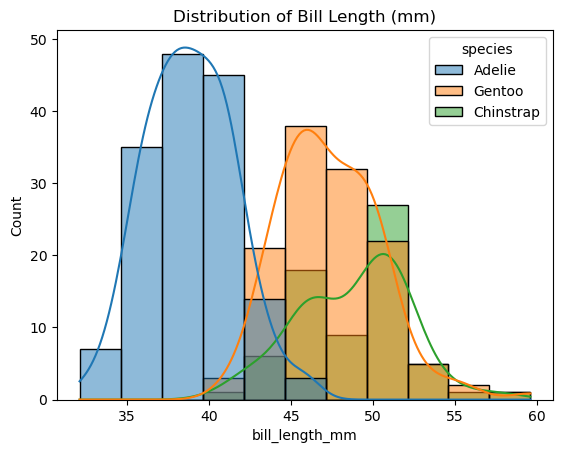

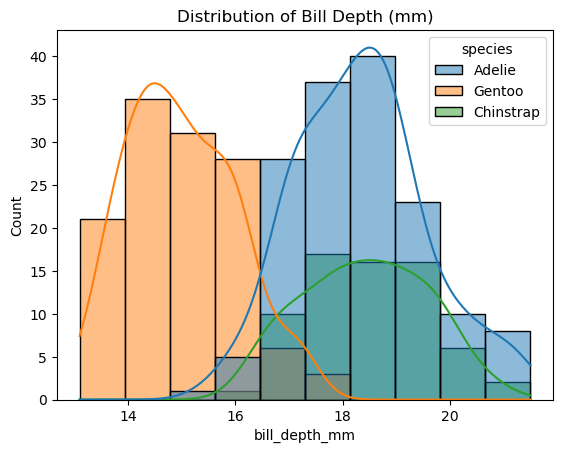

bill_length_mm Skewness: 0.06895157094746862
bill_length_mm Kurtosis: -0.840340117435519
bill_depth_mm Skewness: -0.14456227936809193
bill_depth_mm Kurtosis: -0.8988248742697382


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

sns.histplot(data, x="bill_length_mm", hue="species", kde=True)
plt.title("Distribution of Bill Length (mm)")
plt.show()

sns.histplot(data, x="bill_depth_mm", hue="species", kde=True)
plt.title("Distribution of Bill Depth (mm)")
plt.show()

for feature in ['bill_length_mm', 'bill_depth_mm']:
    print(f"{feature} Skewness: {skew(data[feature])}")
    print(f"{feature} Kurtosis: {kurtosis(data[feature])}")

Outliers detected:
 bill_depth_mm        0
bill_length_mm       0
body_mass_g          3
flipper_length_mm    0
island               0
sex                  0
species              0
dtype: int64


C:\Users\chari\AppData\Local\Temp\ipykernel_12748\3155401146.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))


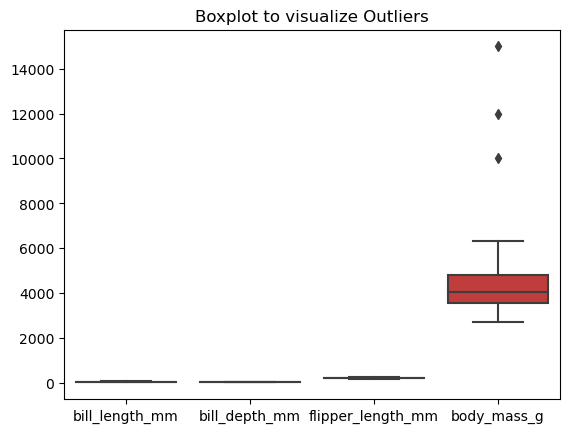

In [16]:

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1


outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
print("Outliers detected:\n", outliers.sum())


sns.boxplot(data=data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
plt.title("Boxplot to visualize Outliers")
plt.show()

Explained variance by each component: [0.61711071 0.19733481]


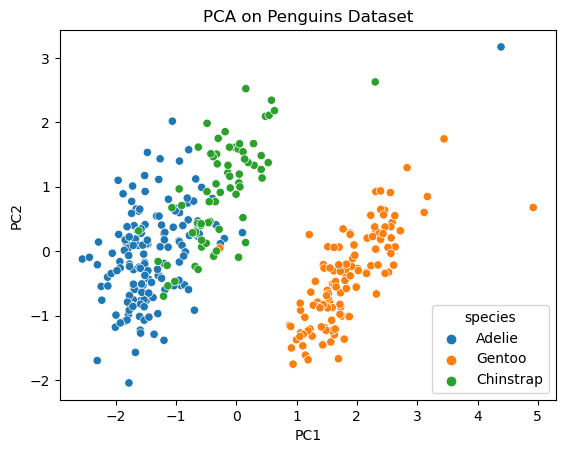

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

print("Explained variance by each component:", pca.explained_variance_ratio_)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
sns.scatterplot(x='PC1', y='PC2', hue=data['species'], data=pca_df)
plt.title("PCA on Penguins Dataset")
plt.show()

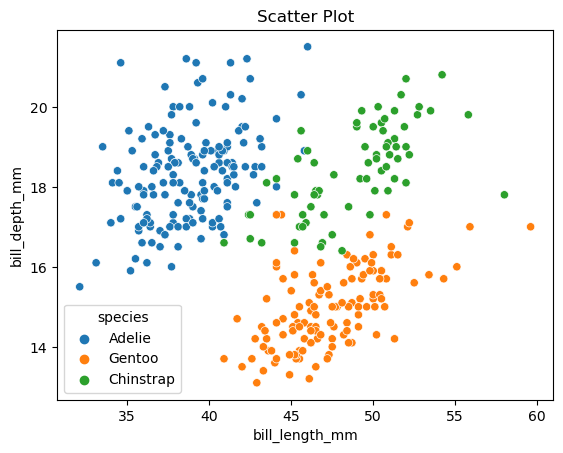

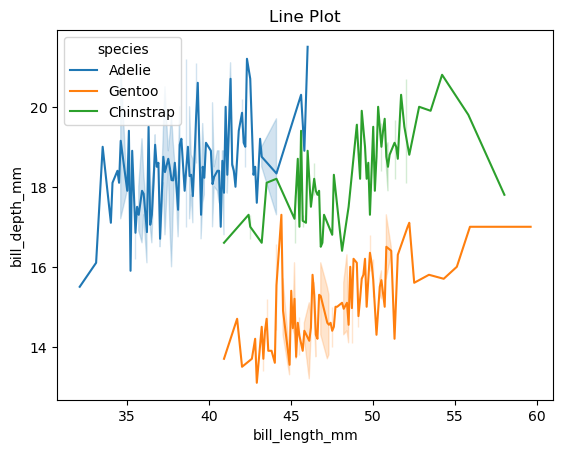

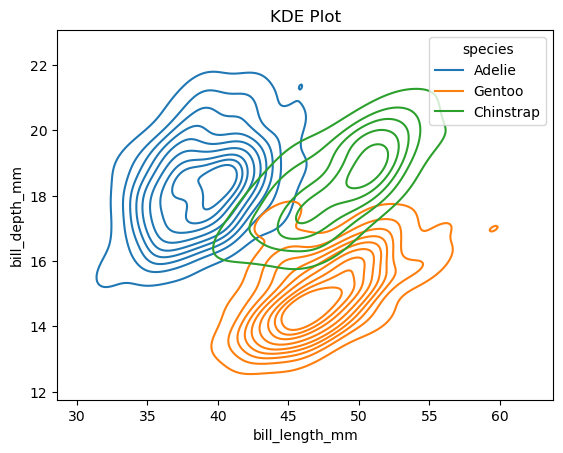

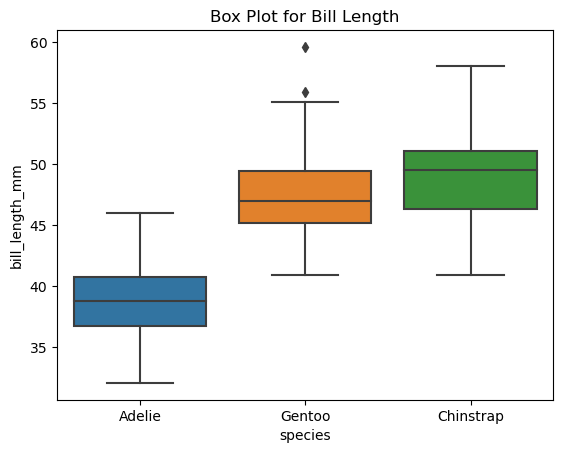

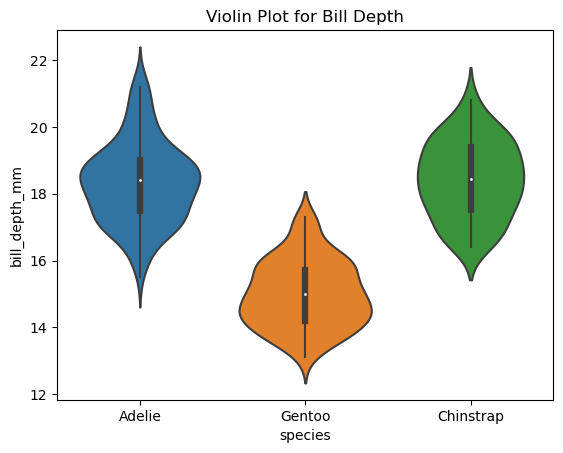

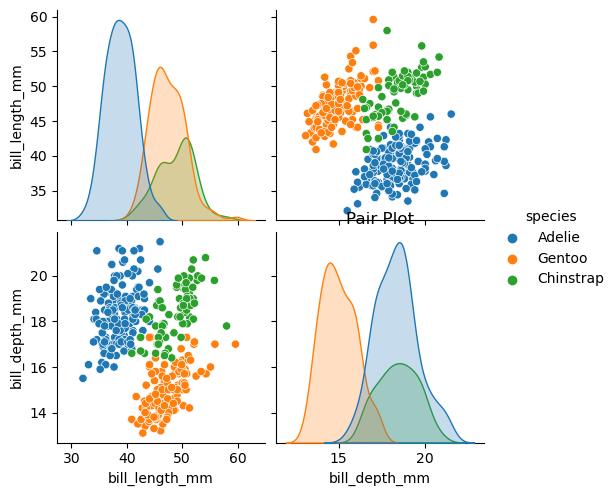

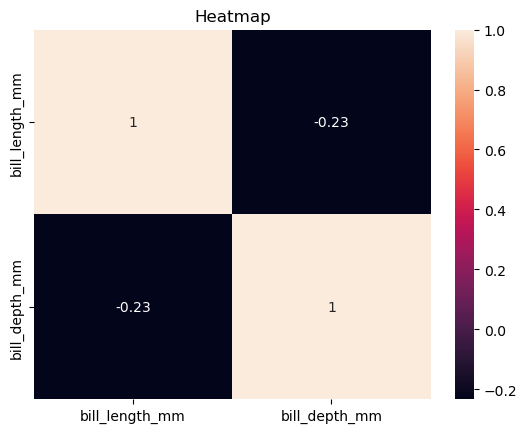

In [18]:
# Scatter plot
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=data)
plt.title("Scatter Plot")
plt.show()

# Line plot
sns.lineplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=data)
plt.title("Line Plot")
plt.show()

# KDE plot
sns.kdeplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=data)
plt.title("KDE Plot")
plt.show()

# Box plot
sns.boxplot(x='species', y='bill_length_mm', data=data)
plt.title("Box Plot for Bill Length")
plt.show()

# Violin plot
sns.violinplot(x='species', y='bill_depth_mm', data=data)
plt.title("Violin Plot for Bill Depth")
plt.show()

# Pairplot
sns.pairplot(data, vars=['bill_length_mm', 'bill_depth_mm'], hue='species')
plt.title("Pair Plot")
plt.show()

# Heatmap
correlation_matrix = data[['bill_length_mm', 'bill_depth_mm']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Heatmap")
plt.show()

In [19]:
max_flipper_length = data.groupby(['species', 'island'])['flipper_length_mm'].max()
print("Maximum Flipper Length per Species and Island:\n", max_flipper_length)

Maximum Flipper Length per Species and Island:
 species    island   
Adelie     Biscoe       203.0
           Dream        208.0
           Torgersen    210.0
Chinstrap  Dream        212.0
Gentoo     Biscoe       231.0
Name: flipper_length_mm, dtype: float64


In [20]:
from scipy.stats import zscore

normalized_data = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].apply(zscore)

for col in normalized_data.columns:
    data[f"{col}_zscore"] = normalized_data[col]

print("Z-Score Normalized Data:\n", data.head())

Z-Score Normalized Data:
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            44.1           17.3              197.0   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  bill_length_mm_zscore  bill_depth_mm_zscore  \
0       3750.0    male              -0.883054              0.787289   
1       3800.0  female              -0.809180              0.126114   
2       3250.0  female              -0.661432              0.431272   
3       4050.0    male               0.040373              0.075255   
4       3450.0  female              -1.326299              1.092447   

   flipper_length_mm_zscore  body_mass_g_zscore  
0                 -1.420541           -0.468990  
1 